## Objective of this exercise is to produce analysis report  
_Here is the [DATA](https://docs.google.com/spreadsheets/d/15ffx-47yoKUZYhUb5IJbZ6_0rPXq0yg5o6V216bTPJA/edit#gid=770993173) in use._

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


%matplotlib inline

In [21]:
df = pd.read_csv('Chief of Staff _ Do-At-Home Challenge _ 2022 _ Data.csv')
df

,Database Identifier,Category,Priority Assigned,Local Intervention required,Time to fix,Date,Robot Name
0,DBE-653,Hardware (wiring),Low,No,60,3/9/2022,Robot003
1,DBE-654,Hardware (wiring),Medium,No,5,4/12/2022,Robot003
2,DBE-655,Hardware (wiring),Urgent,No,15,2/28/2022,Robot005
3,DBE-656,Hardware (wiring),Medium,No,300,4/8/2022,Robot003
4,DBE-657,Hardware (wiring),Medium,Yes,30,1/16/2022,Robot012
...,...,...,...,...,...,...,...
141,DBE-794,Software (planned test),Low,No,15,2/1/2022,Robot012
142,DBE-795,Hardware (wiring),Medium,No,15,2/10/2022,Robot003
143,DBE-796,External event,Urgent,Yes,300,1/19/2022,Robot003
144,DBE-797,Hardware (wiring),Low,No,60,4/21/2022,Robot010


In [3]:
df.shape

(146, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Database Identifier          146 non-null    object
 1   Category                     146 non-null    object
 2   Priority Assigned            146 non-null    object
 3   Local Intervention required  146 non-null    object
 4   Time to fix                  146 non-null    int64 
 5   Date                         146 non-null    object
 6   Robot Name                   146 non-null    object
dtypes: int64(1), object(6)
memory usage: 8.1+ KB


In [5]:
df.describe()

,Time to fix
count,146.000000
mean,83.013699
std,98.901692
min,5.000000
25%,15.000000
50%,30.000000
75%,120.000000
max,360.000000


In [6]:
df['Time to fix'].describe()

count    146.000000
mean      83.013699
std       98.901692
min        5.000000
25%       15.000000
50%       30.000000
75%      120.000000
max      360.000000
Name: Time to fix, dtype: float64

In [7]:
df['Time to fix'].mean()

83.01369863013699

In [8]:
df['Time to fix'].median()

30.0

<AxesSubplot:>

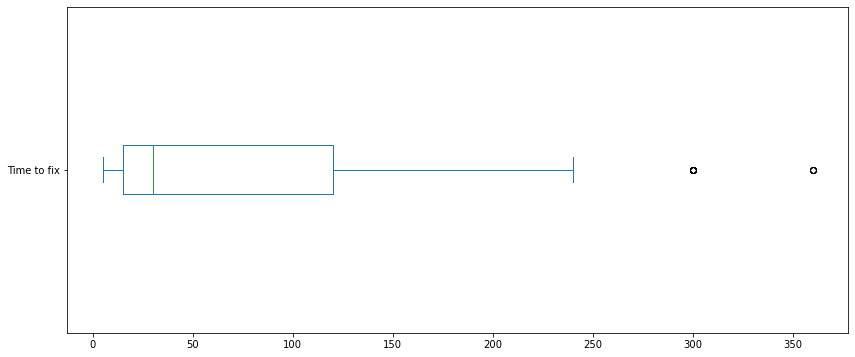

In [9]:
df['Time to fix'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:ylabel='Density'>

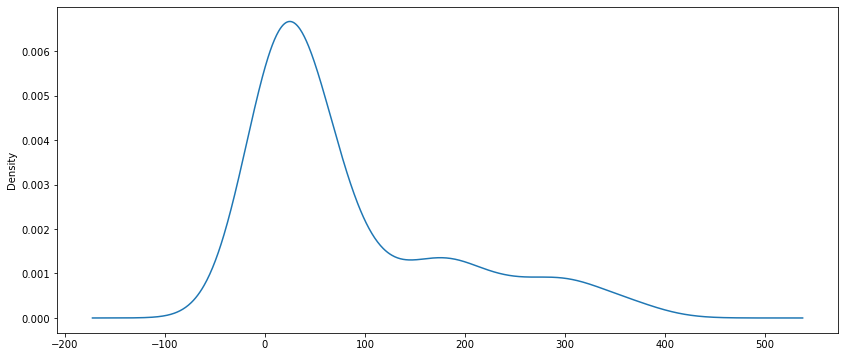

In [10]:
df['Time to fix'].plot(kind='density', figsize=(14,6)) 

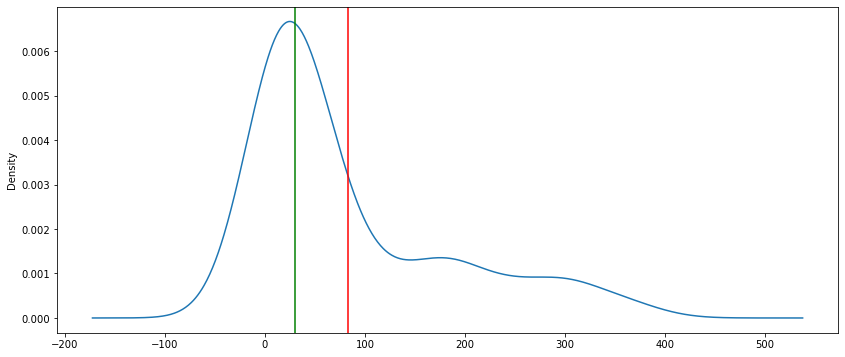

In [11]:
ax=df['Time to fix'].plot(kind='density', figsize=(14,6)) 
ax.axvline(df['Time to fix'].mean(), color='red')
ax.axvline(df['Time to fix'].median(), color='green')


Text(0.5, 0, 'Priority Assigned')

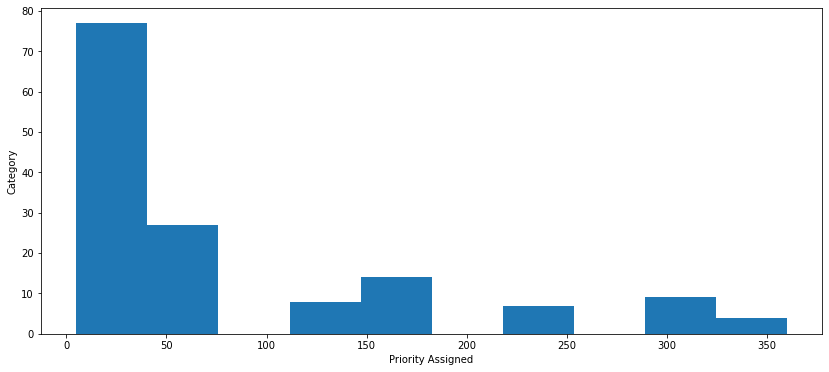

In [12]:
ax=df['Time to fix'].plot(kind='hist', figsize=(14,6)) 
ax.set_ylabel('Category')
ax.set_xlabel('Priority Assigned')


In [13]:
df['Local Intervention required'].value_counts()

No     113
Yes     33
Name: Local Intervention required, dtype: int64

<AxesSubplot:ylabel='Local Intervention required'>

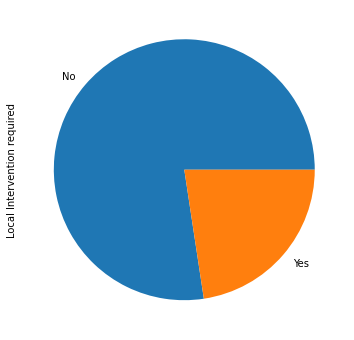

In [14]:
df['Local Intervention required'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Time to fix')

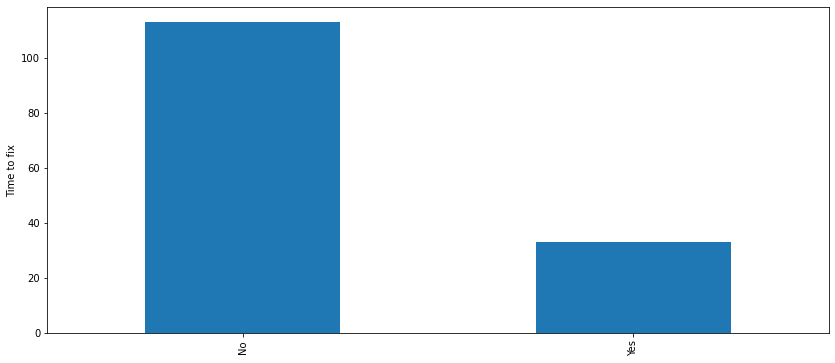

In [15]:
ax = df['Local Intervention required'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Time to fix')

In [16]:
corr = df.corr()

corr

,Time to fix
Time to fix,1.0


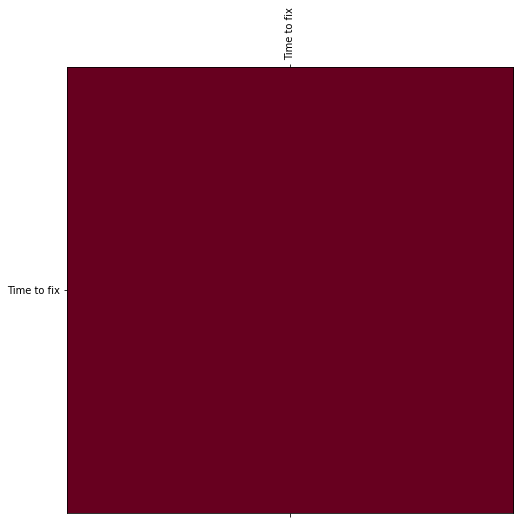

In [17]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

<AxesSubplot:xlabel='Time to fix', ylabel='Priority Assigned'>

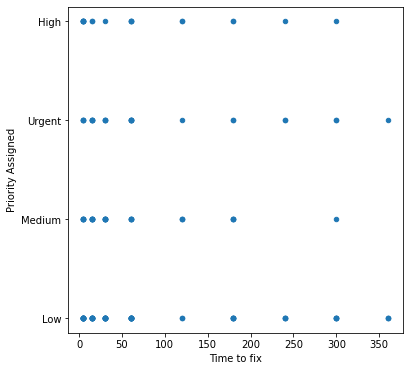

In [18]:
df.plot(kind='scatter', x='Time to fix', y='Priority Assigned', figsize=(6,6))


Text(0, 0.5, 'Time to fix')

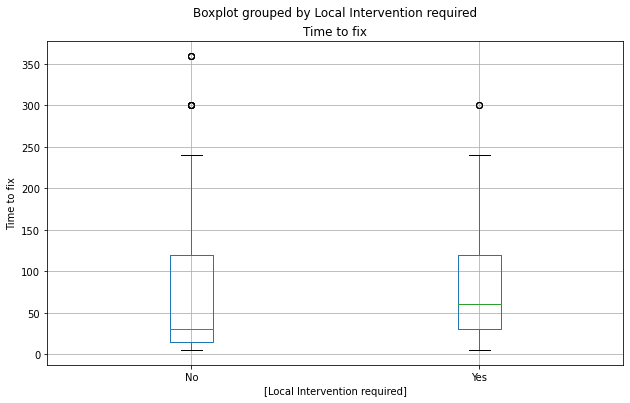

In [19]:
ax = df[['Time to fix', 'Local Intervention required']].boxplot(by='Local Intervention required', figsize=(10,6))
ax.set_ylabel('Time to fix')